In [ ]:
!pip install h5py pyyaml
!pip install tensorflow_text
!pip install tensorflow-text --no-dependencies

In [ ]:
import tensorflow as tf
import keras
import tensorflow_hub as hub
import os
import tensorflow_text as text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade tensorflow
!pip install tensorflow-hub

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
#load the saved model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/fake_news_detection/model3.h5",custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/fake_news_detection/News_dataset.csv")
df.head()

,Title,Description,label
0,मिस नेपाल २०२२काे आवेदन खुला,काठमाडौं वैशाख ६ गते मिस नेपाल २०२२का आवेदन खु...,0
1,वीर मुस्लिम विद्यार्थीले यहूदी महिलालाई हिंस्र...,१७ वर्षीय अहमद खलिफाले घृणित ब्रुकलिन सबवे ट्र...,1
2,भीमफेदी–कुलेखानी सुरुङमार्ग ६ परामर्शदाता छनोट,प्रदेश राजधानी हेटौंडा संघीय राजधानी काठमाडौंब...,0
3,स्यान्डर्स अभियानले DNC बिरूद्ध मुद्दा फिर्ता ...,तपाईले महिना याद बर्नी स्यान्डर्स अभियानले DNC...,1
4,वामपन्थी नेता विष्णुबहादुर मानन्धरको निधन,वरिष्ठ वामपन्थी नेता विष्णुबहादुर मानन्धरको नि...,0


In [ ]:
# split the data into training and test sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['label'], test_size=0.2, random_state=42)

In [ ]:
y_predicted = loaded_model.predict(X_test)


119/119 [==============================] - 54s 423ms/step


In [ ]:
import numpy as np
y_predicted=y_predicted.flatten()
y_predicted = np.round(y_predicted,3)

In [ ]:
y_predicted[:10]

array([0.015, 0.997, 0.997, 0.   , 0.585, 0.   , 0.999, 0.998, 0.995,
       0.   ], dtype=float32)

In [ ]:
import numpy as np
y_test_array = y_test.values

# use boolean indexing to select only the 0s and 1s
y_test_01 = y_test_array[(y_test_array == 0) | (y_test_array == 1)]
y_test_01=np.array(y_test_01)
print(y_test_01)

[0 1 1 ... 1 1 1]


(-0.1, 1.1)

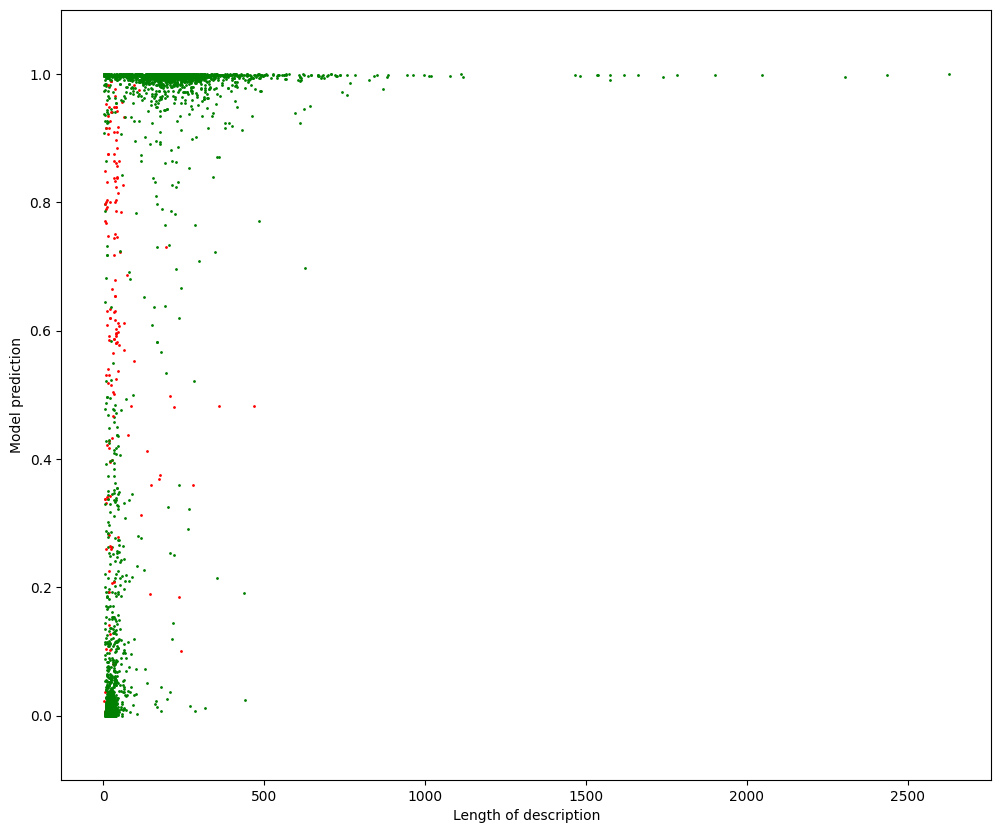

In [ ]:

import matplotlib.pyplot as plt
y_pred = y_predicted  # Make predictions on the test data
y_pred_rounded = [round(pred) for pred in y_pred]  # Round the predictions to 0 or 1

# Calculate the length of each description in the test data
desc_lengths = [len(desc.split()) for desc in X_test]

# Create two lists to store the x and y coordinates of the points to be plotted
x_coords = []
y_coords = []

#for checking if plot  is working correctly

    #y_pred=np.append(y_pred,0.6)
    #y_pred=np.append(y_pred,0.4)

    #desc_lengths=np.append(desc_lengths,1000)
    #desc_lengths=np.append(desc_lengths,1000)
    #plt.scatter(desc_lengths[0], y_pred[0], color='green')
    #plt.scatter(desc_lengths[0], y_pred[0], color='red')

# Iterate over the predictions and actual values and add the corresponding points to the lists
plt.figure(figsize=(12, 10),alpha=0.1)
for i in range(len(y_test_01)):

    if y_pred_rounded[i] == y_test_01[i]:
        color = 'green'  # If the prediction is correct, plot the point as green
    else:
        color = 'red'  # If the prediction is incorrect, plot the point as red
    x_coords.append(desc_lengths[i])
    y_coords.append(y_pred[i])

    plt.scatter(desc_lengths[i], y_pred[i],s=1, color=color)

# Set the x and y labels for the plot
plt.xlabel('Length of description')
plt.ylabel('Model prediction')


#adding legend

#correct_patch = plt.plot([],[], marker="o", ms=5, ls="", mec=None, color='green', label='Correct Prediction')
#incorrect_patch = plt.plot([],[], marker="o", ms=5, ls="", mec=None, color='red', label='Incorrect Prediction')
#plt.legend(handles=[correct_patch[0], incorrect_patch[0]])

# Show the plot

plt.ylim(-0.1,1.1)


In [ ]:
loaded_model.predict([["काठमाडौ ।आफूलाई सामाजिक अभियान्त बताउँदैै आएकी सर्मिला वाइवाले आफ्नो फेसबुकमा एक तस्बीर सेयर गर्दै वरिष्ठ पत्रकार ऋषि धमलालाई १ सय १० को जोरो आउने बनाउने लेखेकी छिन् ।राष्ट्रिय स्वतन्त्र पार्टीका सभापति रवि लामिछानेले पत्रकार सम्मेलन गर्दै ऋषि धमला सहित केही पत्रकारहरुलाई नामै तोकेर आरोप लगाएपछि अहिले सामाजिक सञ्जालमा चर्चाको बिषय बनेको छ ।अन्य समाचार / काठमाडौं । राष्ट्रिय स्वतन्त्र पार्टीका सभापति रवि लामिछानेले विशेष पत्रकार सम्मेलन गर्ने भएका छन् । रिक्त गृहमन्त्री पूर्तिको विषयले सत्तागठबन्धनमा समेत खटपट आइरहेको बेला लामिछानेले पत्रकार सम्मेलन गर्न लागेका हुन् ।गृहको सट्टा भौतिक पूर्वाधार मन्त्रालय लिन प्रधानमन्त्री प्रचण्डले रास्वपालाई प्रस्ताव गरेका छन् । गृहकै अडानमा रहेको उक्त पार्टीले प्रधानमन्त्रीको नयाँ प्रस्तावमा आवश्यक छलफल तथा निर्णय गर्न केहीबेरमा केन्द्रीय समिति र संसदीय दलको संयुक्त बैठक बोलाएको छ ।रविले बैठकलगत्तै पार्टी कार्यालयबाट विशेष पत्रकार सम्मेलन गर्ने जानकारी गराएका छन् ।उनले आफूले सीधा कुरा नगरेको धेरै भएकाले पत्रकार सम्मेलन हेर्न र सुन्न सबैमा अनुरोधसमेत गरेका छन् ।‘पार्टीको बैठकले आज ठोस निर्णय लिन्छ त्यो आफ्नै ठाउँमा छ । त्यसलगत्तै पार्टी कार्यालयबाट आज म विषेश पत्रकार सम्मेलन गर्दैछु । म चाहन्छु सिङ्गो देश र विदेशमा रहनुहुनेहरू सबैले आजको पत्रकार सम्मेलन हेरुन्, सुनुन् । मैले सीधा कुरा नगरेको धेरै भएछ’, रविले लेखेका छन् ।बिहीबार पनि उनले आफू अभिमन्यु नभएको भन्दै मौनता आजसम्म (बिहीबार) सम्मका लागि मात्र भएको चेतावनीपूर्ण स्टाटस लेखेका थिए ।काठमाडौ ।आफूलाई सामाजिक अभियान्त बताउँदैै आएकी सर्मिला वाइवाले आफ्नो फेसबुकमा एक तस्बीर सेयर गर्दै वरिष्ठ पत्रकार ऋषि धमलालाई १ सय १० को जोरो आउने बनाउने लेखेकी छिन् ।राष्ट्रिय स्वतन्त्र पार्टीका सभापति रवि लामिछानेले पत्रकार सम्मेलन गर्दै ऋषि धमला सहित केही पत्रकारहरुलाई नामै तोकेर आरोप लगाएपछि अहिले सामाजिक सञ्जालमा चर्चाको बिषय बनेको छ ।अन्य समाचार / काठमाडौं । राष्ट्रिय स्वतन्त्र पार्टीका सभापति रवि लामिछानेले विशेष पत्रकार सम्मेलन गर्ने भएका छन् । रिक्त गृहमन्त्री पूर्तिको विषयले सत्तागठबन्धनमा समेत खटपट आइरहेको बेला लामिछानेले पत्रकार सम्मेलन गर्न लागेका हुन् ।गृहको सट्टा भौतिक पूर्वाधार मन्त्रालय लिन प्रधानमन्त्री प्रचण्डले रास्वपालाई प्रस्ताव गरेका छन् । गृहकै अडानमा रहेको उक्त पार्टीले प्रधानमन्त्रीको नयाँ प्रस्तावमा आवश्यक छलफल तथा निर्णय गर्न केहीबेरमा केन्द्रीय समिति र संसदीय दलको संयुक्त बैठक बोलाएको छ ।रविले बैठकलगत्तै पार्टी कार्यालयबाट विशेष पत्रकार सम्मेलन गर्ने जानकारी गराएका छन् ।उनले आफूले सीधा कुरा नगरेको धेरै भएकाले पत्रकार सम्मेलन हेर्न र सुन्न सबैमा अनुरोधसमेत गरेका छन् ।‘पार्टीको बैठकले आज ठोस निर्णय लिन्छ त्यो आफ्नै ठाउँमा छ । त्यसलगत्तै पार्टी कार्यालयबाट आज म विषेश पत्रकार सम्मेलन गर्दैछु । म चाहन्छु सिङ्गो देश र विदेशमा रहनुहुनेहरू सबैले आजको पत्रकार सम्मेलन हेरुन्, सुनुन् । मैले सीधा कुरा नगरेको धेरै भएछ’, रविले लेखेका छन् ।बिहीबार पनि उनले आफू अभिमन्यु नभएको भन्दै मौनता आजसम्म (बिहीबार) सम्मका लागि मात्र भएको चेतावनीपूर्ण स्टाटस लेखेका थिए ।अध्यक्ष/प्रबन्ध निर्देशक – कृष्णराज अधिकारीप्रधान सम्पादक – माया अधिकारी"]])

1/1 [==============================] - 2s 2s/step


array([[0.00236249]], dtype=float32)

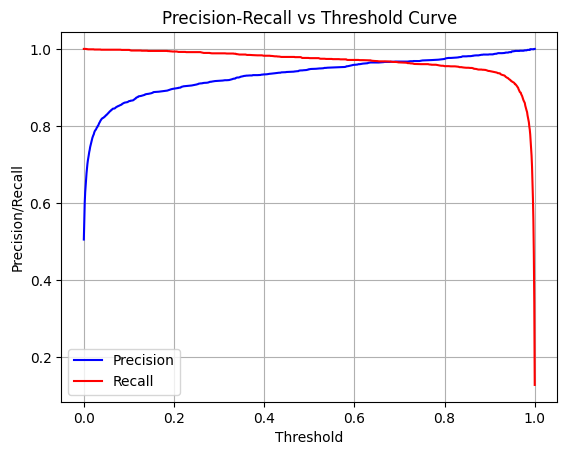

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


# Calculate precision and recall values at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

# Plot precision-recall curve against thresholds
plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
plt.plot(thresholds, recall[:-1], 'r-', label='Recall')

# Set axis labels and title
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall vs Threshold Curve')

plt.grid()

# Add legend
plt.legend()

# Show the plot
plt.show()


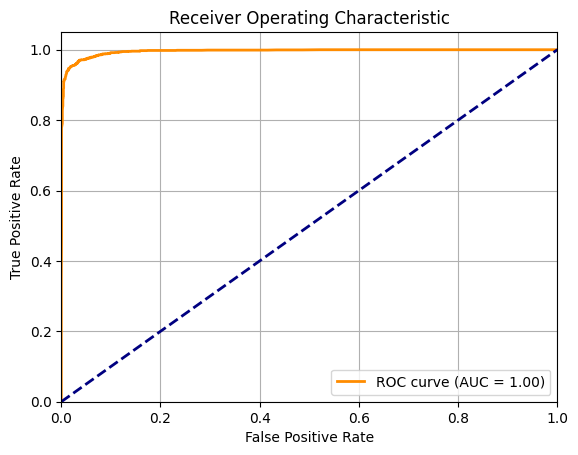

In [ ]:
#ROC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
loaded_model.predict([["काठमाडौ ।आफूलाई सामाजिक अभियान्त बताउँदैै आएकी सर्मिला वाइवाले आफ्नो फेसबुकमा एक तस्बीर सेयर गर्दै वरिष्ठ पत्रकार ऋषि धमलालाई १ सय १० को जोरो आउने बनाउने लेखेकी छिन् ।राष्ट्रिय स्वतन्त्र पार्टीका सभापति रवि लामिछानेले पत्रकार सम्मेलन गर्दै ऋषि धमला सहित केही पत्रकारहरुलाई नामै तोकेर आरोप लगाएपछि अहिले सामाजिक सञ्जालमा चर्चाको बिषय बनेको छ ।अन्य समाचार / काठमाडौं । राष्ट्रिय स्वतन्त्र पार्टीका सभापति रवि लामिछानेले विशेष पत्रकार सम्मेलन गर्ने भएका छन् । रिक्त गृहमन्त्री पूर्तिको विषयले सत्तागठबन्धनमा समेत खटपट आइरहेको बेला लामिछानेले पत्रकार सम्मेलन गर्न लागेका हुन् ।गृहको सट्टा भौतिक पूर्वाधार मन्त्रालय लिन प्रधानमन्त्री प्रचण्डले रास्वपालाई प्रस्ताव गरेका छन् । गृहकै अडानमा रहेको उक्त पार्टीले प्रधानमन्त्रीको नयाँ प्रस्तावमा आवश्यक छलफल तथा निर्णय गर्न केहीबेरमा केन्द्रीय समिति र संसदीय दलको संयुक्त बैठक बोलाएको छ ।रविले बैठकलगत्तै पार्टी कार्यालयबाट विशेष पत्रकार सम्मेलन गर्ने जानकारी गराएका छन् ।उनले आफूले सीधा कुरा नगरेको धेरै भएकाले पत्रकार सम्मेलन हेर्न र सुन्न सबैमा अनुरोधसमेत गरेका छन् ।‘पार्टीको बैठकले आज ठोस निर्णय लिन्छ त्यो आफ्नै ठाउँमा छ । त्यसलगत्तै पार्टी कार्यालयबाट आज म विषेश पत्रकार सम्मेलन गर्दैछु । म चाहन्छु सिङ्गो देश र विदेशमा रहनुहुनेहरू सबैले आजको पत्रकार सम्मेलन हेरुन्, सुनुन् । मैले सीधा कुरा नगरेको धेरै भएछ’, रविले लेखेका छन् ।बिहीबार पनि उनले आफू अभिमन्यु नभएको भन्दै मौनता आजसम्म (बिहीबार) सम्मका लागि मात्र भएको चेतावनीपूर्ण स्टाटस लेखेका थिए ।काठमाडौ ।आफूलाई सामाजिक अभियान्त बताउँदैै आएकी सर्मिला वाइवाले आफ्नो फेसबुकमा एक तस्बीर सेयर गर्दै वरिष्ठ पत्रकार ऋषि धमलालाई १ सय १० को जोरो आउने बनाउने लेखेकी छिन् ।राष्ट्रिय स्वतन्त्र पार्टीका सभापति रवि लामिछानेले पत्रकार सम्मेलन गर्दै ऋषि धमला सहित केही पत्रकारहरुलाई नामै तोकेर आरोप लगाएपछि अहिले सामाजिक सञ्जालमा चर्चाको बिषय बनेको छ ।अन्य समाचार / काठमाडौं । राष्ट्रिय स्वतन्त्र पार्टीका सभापति रवि लामिछानेले विशेष पत्रकार सम्मेलन गर्ने भएका छन् । रिक्त गृहमन्त्री पूर्तिको विषयले सत्तागठबन्धनमा समेत खटपट आइरहेको बेला लामिछानेले पत्रकार सम्मेलन गर्न लागेका हुन् ।गृहको सट्टा भौतिक पूर्वाधार मन्त्रालय लिन प्रधानमन्त्री प्रचण्डले रास्वपालाई प्रस्ताव गरेका छन् । गृहकै अडानमा रहेको उक्त पार्टीले प्रधानमन्त्रीको नयाँ प्रस्तावमा आवश्यक छलफल तथा निर्णय गर्न केहीबेरमा केन्द्रीय समिति र संसदीय दलको संयुक्त बैठक बोलाएको छ ।रविले बैठकलगत्तै पार्टी कार्यालयबाट विशेष पत्रकार सम्मेलन गर्ने जानकारी गराएका छन् ।उनले आफूले सीधा कुरा नगरेको धेरै भएकाले पत्रकार सम्मेलन हेर्न र सुन्न सबैमा अनुरोधसमेत गरेका छन् ।‘पार्टीको बैठकले आज ठोस निर्णय लिन्छ त्यो आफ्नै ठाउँमा छ । त्यसलगत्तै पार्टी कार्यालयबाट आज म विषेश पत्रकार सम्मेलन गर्दैछु । म चाहन्छु सिङ्गो देश र विदेशमा रहनुहुनेहरू सबैले आजको पत्रकार सम्मेलन हेरुन्, सुनुन् । मैले सीधा कुरा नगरेको धेरै भएछ’, रविले लेखेका छन् ।बिहीबार पनि उनले आफू अभिमन्यु नभएको भन्दै मौनता आजसम्म (बिहीबार) सम्मका लागि मात्र भएको चेतावनीपूर्ण स्टाटस लेखेका थिए ।अध्यक्ष/प्रबन्ध निर्देशक – कृष्णराज अधिकारीप्रधान सम्पादक – माया अधिकारी"]])

1/1 [==============================] - 2s 2s/step


array([[0.00236249]], dtype=float32)

In [ ]:
def get_prediction(news_description):
    probability = loaded_model.predict([news_description])[0][0]
    return 'fake' if probability > 0.65 else 'real'


In [ ]:
input_data = "काठमाडौ ।आफूलाई सामाजिक अभियान्त बताउँदैै आएकी सर्मिला वाइवाले आफ्नो फेसबुकमा एक तस्बीर सेयर गर्दै वरिष्ठ पत्रकार ऋषि धमलालाई १ सय १० को जोरो आउने बनाउने लेखेकी छिन् ।राष्ट्रिय स्वतन्त्र पार्टीका सभापति रवि लामिछानेले पत्रकार सम्मेलन गर्दै ऋषि धमला सहित केही पत्रकारहरुलाई नामै तोकेर आरोप लगाएपछि अहिले सामाजिक सञ्जालमा चर्चाको बिषय बनेको छ ।अन्य समाचार / काठमाडौं । राष्ट्रिय स्वतन्त्र पार्टीका सभापति रवि लामिछानेले विशेष पत्रकार सम्मेलन गर्ने भएका छन् । रिक्त गृहमन्त्री पूर्तिको विषयले सत्तागठबन्धनमा समेत खटपट आइरहेको बेला लामिछानेले पत्रकार सम्मेलन गर्न लागेका हुन् ।गृहको सट्टा भौतिक पूर्वाधार मन्त्रालय लिन प्रधानमन्त्री प्रचण्डले रास्वपालाई प्रस्ताव गरेका छन् । गृहकै अडानमा रहेको उक्त पार्टीले प्रधानमन्त्रीको नयाँ प्रस्तावमा आवश्यक छलफल तथा निर्णय गर्न केहीबेरमा केन्द्रीय समिति र संसदीय दलको संयुक्त बैठक बोलाएको छ ।रविले बैठकलगत्तै पार्टी कार्यालयबाट विशेष पत्रकार सम्मेलन गर्ने जानकारी गराएका छन् ।उनले आफूले सीधा कुरा नगरेको धेरै भएकाले पत्रकार सम्मेलन हेर्न र सुन्न सबैमा अनुरोधसमेत गरेका छन् ।‘पार्टीको बैठकले आज ठोस निर्णय लिन्छ त्यो आफ्नै ठाउँमा छ । त्यसलगत्तै पार्टी कार्यालयबाट आज म विषेश पत्रकार सम्मेलन गर्दैछु । म चाहन्छु सिङ्गो देश र विदेशमा रहनुहुनेहरू सबैले आजको पत्रकार सम्मेलन हेरुन्, सुनुन् । मैले सीधा कुरा नगरेको धेरै भएछ’, रविले लेखेका छन् ।बिहीबार पनि उनले आफू अभिमन्यु नभएको भन्दै मौनता आजसम्म (बिहीबार) सम्मका लागि मात्र भएको चेतावनीपूर्ण स्टाटस लेखेका थिए ।काठमाडौ ।आफूलाई सामाजिक अभियान्त बताउँदैै आएकी सर्मिला वाइवाले आफ्नो फेसबुकमा एक तस्बीर सेयर गर्दै वरिष्ठ पत्रकार ऋषि धमलालाई १ सय १० को जोरो आउने बनाउने लेखेकी छिन् ।राष्ट्रिय स्वतन्त्र पार्टीका सभापति रवि लामिछानेले पत्रकार सम्मेलन गर्दै ऋषि धमला सहित केही पत्रकारहरुलाई नामै तोकेर आरोप लगाएपछि अहिले सामाजिक सञ्जालमा चर्चाको बिषय बनेको छ ।अन्य समाचार / काठमाडौं । राष्ट्रिय स्वतन्त्र पार्टीका सभापति रवि लामिछानेले विशेष पत्रकार सम्मेलन गर्ने भएका छन् । रिक्त गृहमन्त्री पूर्तिको विषयले सत्तागठबन्धनमा समेत खटपट आइरहेको बेला लामिछानेले पत्रकार सम्मेलन गर्न लागेका हुन् ।गृहको सट्टा भौतिक पूर्वाधार मन्त्रालय लिन प्रधानमन्त्री प्रचण्डले रास्वपालाई प्रस्ताव गरेका छन् । गृहकै अडानमा रहेको उक्त पार्टीले प्रधानमन्त्रीको नयाँ प्रस्तावमा आवश्यक छलफल तथा निर्णय गर्न केहीबेरमा केन्द्रीय समिति र संसदीय दलको संयुक्त बैठक बोलाएको छ ।रविले बैठकलगत्तै पार्टी कार्यालयबाट विशेष पत्रकार सम्मेलन गर्ने जानकारी गराएका छन् ।उनले आफूले सीधा कुरा नगरेको धेरै भएकाले पत्रकार सम्मेलन हेर्न र सुन्न सबैमा अनुरोधसमेत गरेका छन् ।‘पार्टीको बैठकले आज ठोस निर्णय लिन्छ त्यो आफ्नै ठाउँमा छ । त्यसलगत्तै पार्टी कार्यालयबाट आज म विषेश पत्रकार सम्मेलन गर्दैछु । म चाहन्छु सिङ्गो देश र विदेशमा रहनुहुनेहरू सबैले आजको पत्रकार सम्मेलन हेरुन्, सुनुन् । मैले सीधा कुरा नगरेको धेरै भएछ’, रविले लेखेका छन् ।बिहीबार पनि उनले आफू अभिमन्यु नभएको भन्दै मौनता आजसम्म (बिहीबार) सम्मका लागि मात्र भएको चेतावनीपूर्ण स्टाटस लेखेका थिए ।अध्यक्ष/प्रबन्ध निर्देशक कृष्णराज अधिकारीप्रधान सम्पादक माया अधिकारी"
get_prediction(input_data)

1/1 [==============================] - 0s 47ms/step


'real'

In [ ]:
def get_predictions(news_descriptions):
    probabilities = loaded_model.predict(news_descriptions)
    predictions = [1 if prob > 0.65 else 0 for prob in probabilities.flatten()]
    return predictions


In [ ]:
predicted_thre_adj=get_predictions(X_test)

119/119 [==============================] - 48s 406ms/step
